In [41]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# adaptive

In [37]:
file_list = ['./log/index_'+file+'.csv' for file in [
    "message_2016-6-5_2020_adapt5.log",
    "message_2016-6-5_2020_adapt10.log",
    "message_2016-6-5_2020_adapt20.log",
    "message_2016-6-5_2020_adapt30.log",
    "message_2016-6-4_2340.log",  # fixed@20
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-5_2020_adapt5.log.csv
./log/index_message_2016-6-5_2020_adapt10.log.csv
./log/index_message_2016-6-5_2020_adapt20.log.csv
./log/index_message_2016-6-5_2020_adapt30.log.csv
./log/index_message_2016-6-4_2340.log.csv


In [38]:
ts_name = [5, 10, 20, 30, 'fixed@20']
styles = ['-', '-', '-','-', '-']

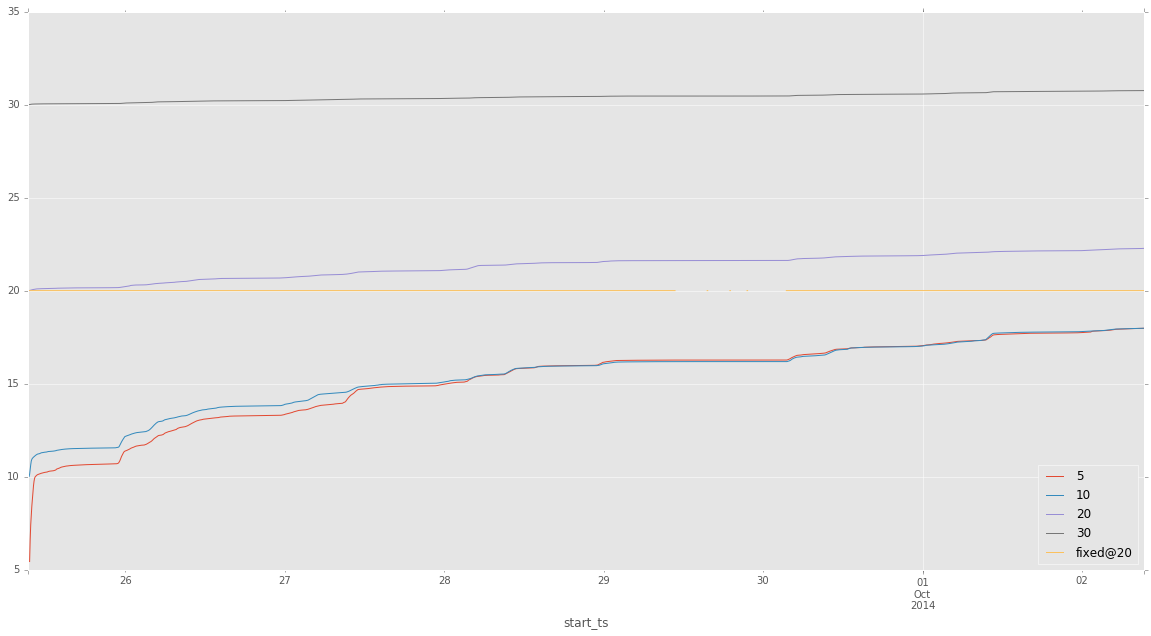

In [39]:
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.reward_scaling.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

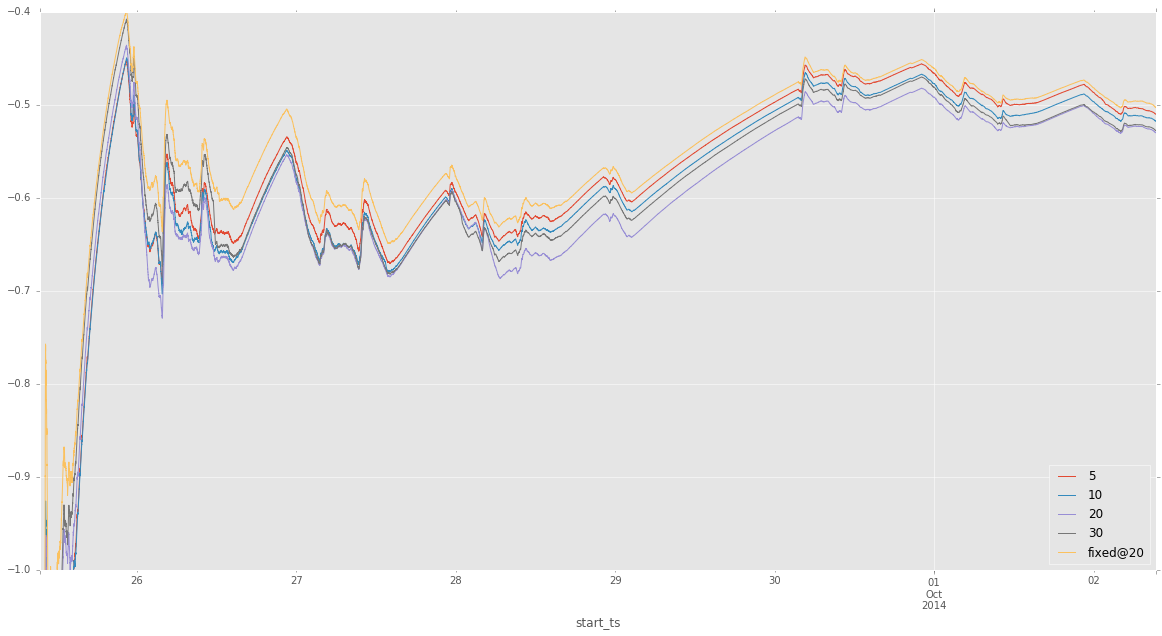

In [40]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
            ylim=(-1, -0.4),
           )

# gamma=0.9 

In [65]:
file_list = ['./log/index_'+file+'.csv' for file in [
#     "message_2016-6-6_1145.log",  # 100
#     "message_2016-6-6_1300.log",  # 50
    "message_2016-6-6_1445_Gamma30.log",  # 30
    "message_2016-6-6_1330.log",  # 25
    "message_2016-6-6_1345_Gamma20.log",  # 20
    "message_2016-6-4_2340.log",  # G0.5, fixed@20
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-6_1445_Gamma30.log.csv
./log/index_message_2016-6-6_1330.log.csv
./log/index_message_2016-6-6_1345_Gamma20.log.csv
./log/index_message_2016-6-4_2340.log.csv


In [66]:
ts_name = ['G=0.9,RS=30','G=0.9,RS=25','G=0.9,RS=20','G=0.5,RS=20', ]
styles = ['-', '-', '-','-', '-']

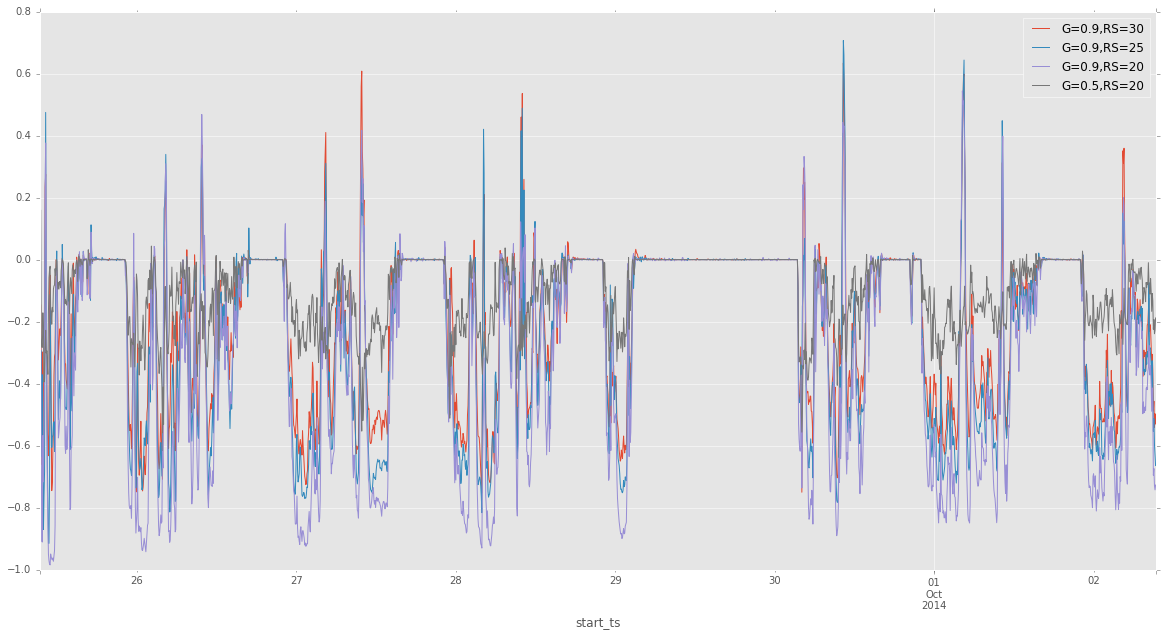

In [70]:
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.q_sleep.resample('5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(0, 120),
           )

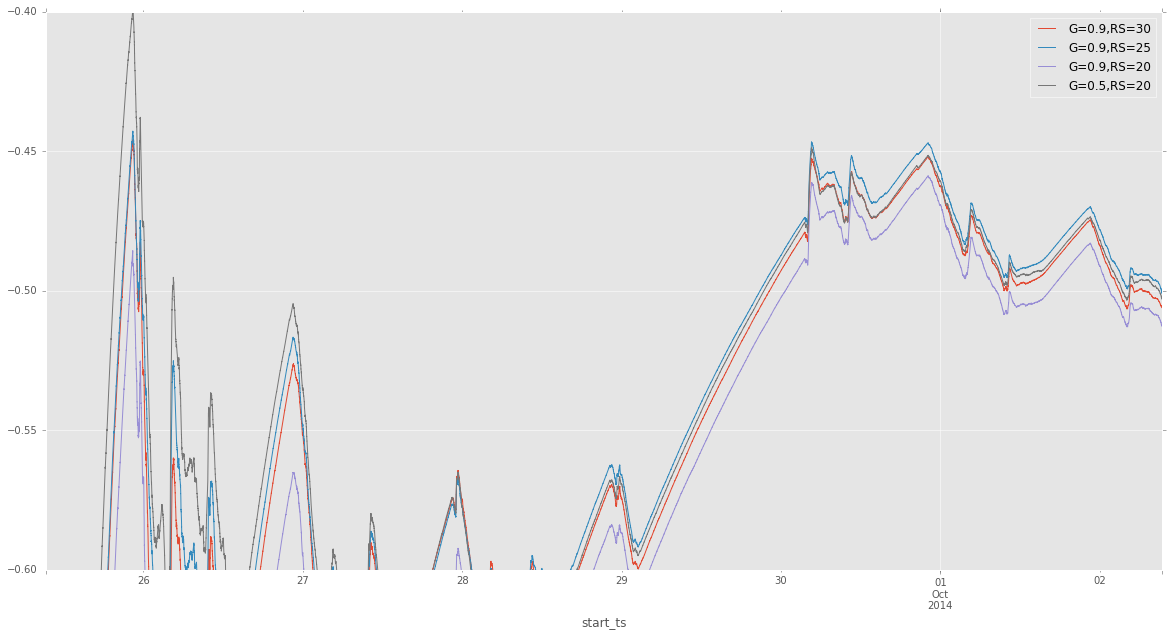

In [69]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
            ylim=(-0.6, -0.4),
           )